## Modelos Não Supervisionados ##

Modelos de aprendizado de máquina não supervisionados são algoritmos que **não recebem rótulos ou variáveis target durante o treinamento**. Ou seja, não há indicação explícita de quais são as "features relevantes" ou quais valores o modelo deve prever.  
Esses modelos têm como objetivo **identificar padrões, agrupamentos ou estruturas nos dados por conta própria**, extraindo relações implícitas sem intervenção supervisionada.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### K-Means Clustering ####

In [75]:
from sklearn.datasets import make_blobs

In [ ]:
# Abaixo, com a função make_blobs, geramos uma dispersão de 200 pontos em duas dimensões.
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2], random_state=101)

# n_samples: quantidade total de pontos gerados
# n_features: número de dimensões (ou variáveis independentes) que cada ponto possui
# centers: número de agrupamentos (clusters) que serão gerados, correspondendo aos centros dos dados
# cluster_std: define o nível de dispersão (variabilidade) de cada cluster individualmente
# random_state: garante que os dados podem ser reproduzidos sempre exatamente iguais com essa semente

In [77]:
# O valor retornado é uma tupla com duas dimensões, a primeira dimensão da tupla contém as posições x e y dos pontos da dispersão.
# A segunda dimensão da tupla contém a categoria à qual o ponto é pertencente
data

(array([[-6.71419265e+00,  1.03932125e+01],
        [ 4.90728366e+00,  5.85747409e+00],
        [-4.54340700e-01,  3.46993806e+00],
        [ 2.85067973e+00,  8.28075279e+00],
        [ 4.47750967e+00,  6.97215388e+00],
        [-1.02351670e+01, -6.31601883e+00],
        [ 2.77693736e+00,  8.39388742e+00],
        [-1.94531663e+00,  1.41408470e+00],
        [ 2.29641395e+00,  7.54884427e+00],
        [-1.53850188e+00,  3.32346476e+00],
        [-6.44379397e+00,  9.87426599e+00],
        [-1.36818141e+00,  2.62528244e+00],
        [ 3.25966685e+00,  7.36381102e+00],
        [ 2.97607330e+00,  5.95782750e+00],
        [-5.43264879e+00,  9.83460048e+00],
        [-6.66235492e-01, -9.47876647e-02],
        [ 4.96544332e+00,  6.23003890e+00],
        [-2.60705549e+00,  4.25161021e-01],
        [-9.82160444e+00, -4.82608993e+00],
        [-4.61639859e+00,  1.17831014e+01],
        [-9.97777536e+00, -6.07283992e+00],
        [ 7.02221598e-01, -5.23385577e-02],
        [ 2.31311946e+00,  3.797

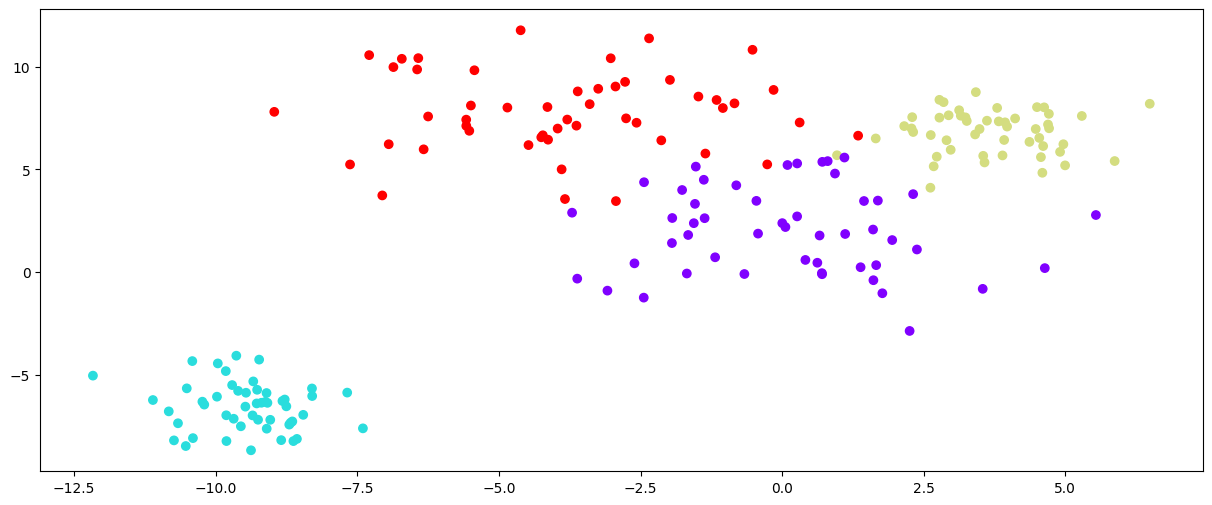

In [92]:
# Plotando os valores em um gráfico, podemos visualizar a formação de 4 clusters.
fig, ax = plt.subplots(figsize = (15, 6))
plt.scatter(x=(data[0][:,0]), y=(data[0][:,1]), c=data[1], cmap='rainbow')

In [80]:
from sklearn.cluster import KMeans

In [81]:
# Instancia o modelo e define que o número de agrupamentos a serem localizados é 4
kmeans = KMeans(n_clusters=4)

# Treinamento do modelo com as coordenadas dos pontos da dispersão
kmeans.fit(data[0])

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [82]:
# Aqui podemos observar os centróides dos clusters que o modelo localizou
kmeans.cluster_centers_

array([[ 3.28596866,  6.53589012],
       [-9.45212819, -6.56470497],
       [-4.17389202,  8.0608289 ],
       [-0.31922142,  1.65750485]])

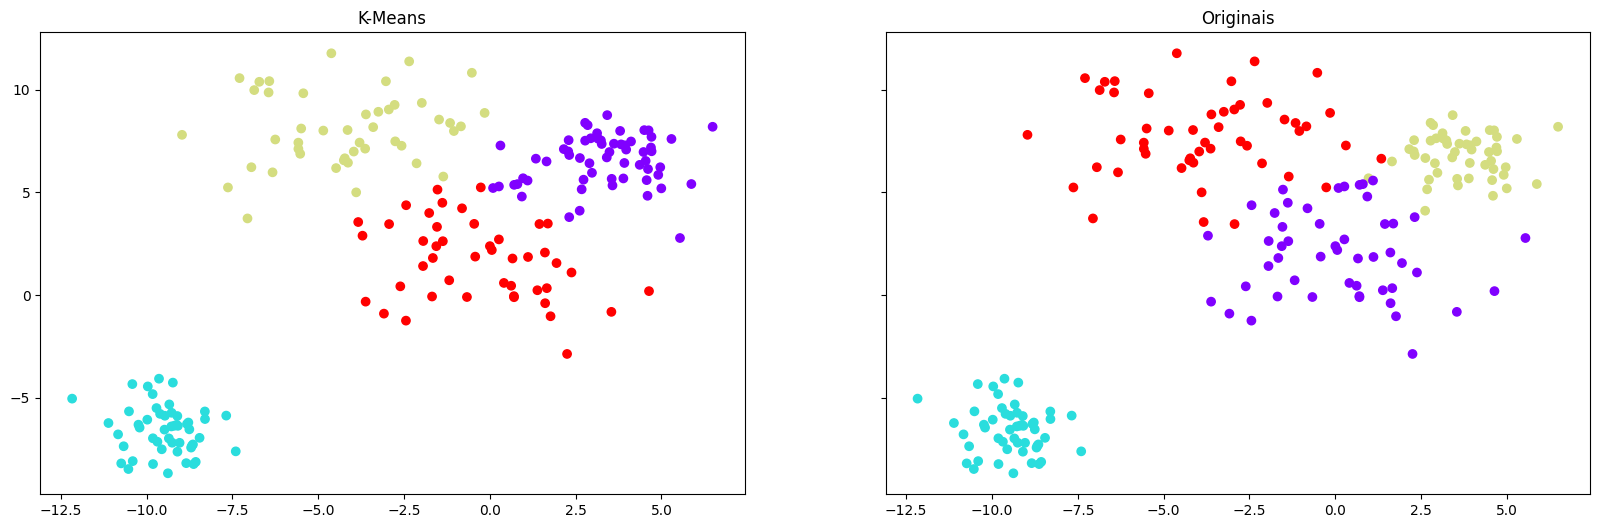

In [93]:
# Agora na prática podemos observar a semelhança entre os clusters que o modelo achou e os reais
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (20, 6))

ax1.set_title('K-Means')
ax1.scatter(x=(data[0][:,0]), y=(data[0][:,1]), c=kmeans.labels_, cmap='rainbow')

ax2.set_title('Originais')
ax2.scatter(x=(data[0][:,0]), y=(data[0][:,1]), c=data[1], cmap='rainbow')


### Elbow Method ###

O método do cotovelo (ou elbow method) é uma técnica visual usada para determinar o **número ideal de clusters** em algoritmos de agrupamento como o K-Means. Ele ajuda a responder a pergunta: **quantos grupos fazem sentido para os meus dados?**


In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [95]:
kmeans.inertia_

993.9944646216014

No gráfico abaixo, o eixo X representa o número de clusters (`k`) e o eixo Y mostra a métrica WCSS (*Within-Cluster Sum of Squares*), ou seja, a soma das distâncias quadradas entre os pontos e seus respectivos centróides.

**WCSS (Within-Cluster Sum of Squares):**  
Essa métrica mede o quanto os dados estão agrupados em relação ao centro de cada cluster. Ela é obtida ao elevar ao quadrado a distância de cada ponto em relação ao seu centróide, permitindo calcular a **inércia** — uma forma de estimar a variância interna dos agrupamentos.

Em outras palavras, o ideal é que os clusters tenham **baixa dispersão interna** (menor distância dos centróides), mas sem perder a **capacidade de generalização**. Caso contrário, o modelo pode se ajustar demais aos dados, caracterizando *overfitting*.

No gráfico, conseguimos visualizar o “cotovelo” se formando: o ponto em que o WCSS deixa de cair significativamente em relação ao número anterior de clusters. Esse ponto indica o **número ideal de agrupamentos**, além do qual os ganhos são mínimos.

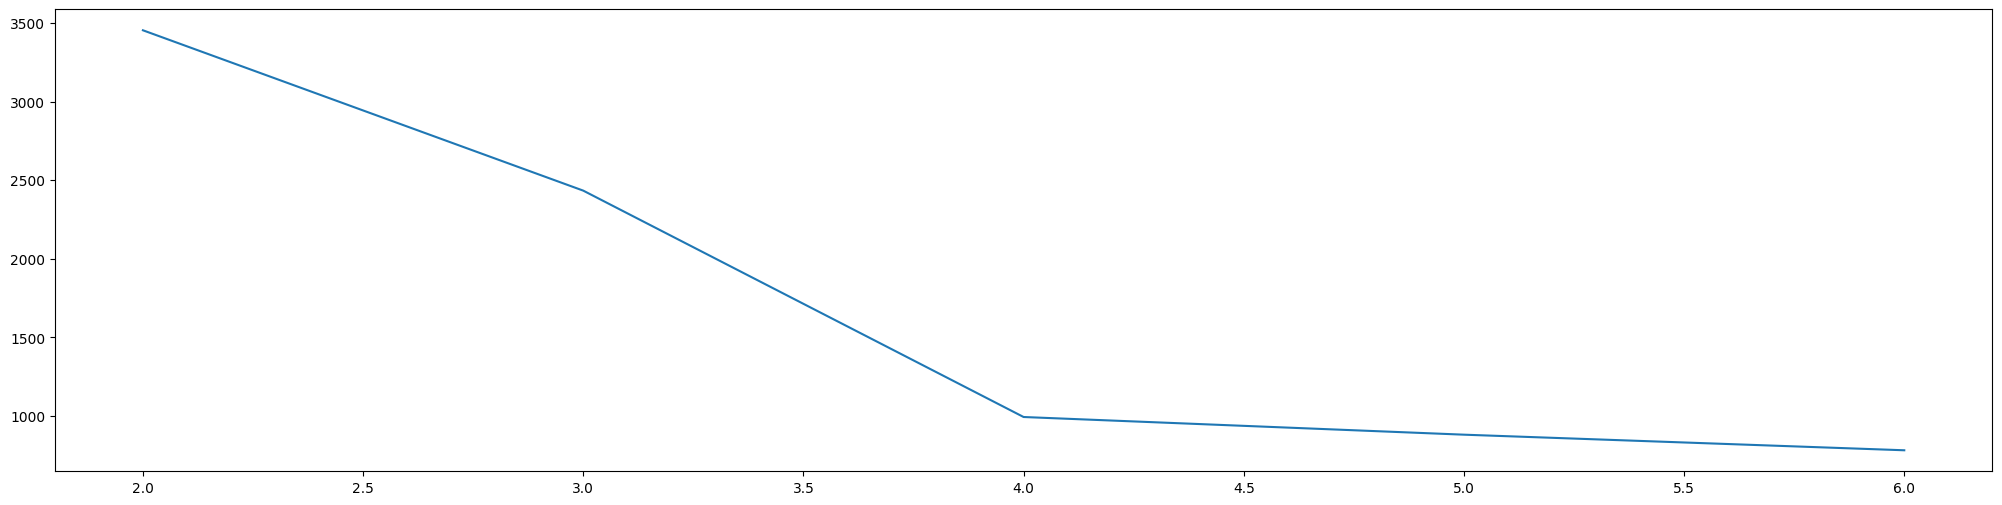

In [100]:
f, ax = plt.subplots(figsize = (25, 6))

list_inertia = []
list_k = []

for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[0])
    
    list_inertia += [kmeans.inertia_]
    list_k += [k]

ax.plot(list_k, list_inertia)

In [99]:
list_inertia

[3453.9965273316784,
 2433.9783329001493,
 993.7671913130329,
 834.9516332790059,
 705.2717761199001]